In [ ]:
import pandas as pd

In [ ]:
df_paises = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/DataSets/Covid 19/country_wise_latest.csv')
df_mundo = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/DataSets/Covid 19/worldometer_data.csv')

In [ ]:
!pip install -U gitly

     |████████████████████████████████| 13.2MB 3.9MB/s 
     |████████████████████████████████| 74.6MB 1.3MB/s 
  Created wheel for gitly: filename=gitly-1.1.4-cp36-none-any.whl size=4520 sha256=89b7daee8469be59b9d0a244720690f05dcba31b7e4b4c727846b02f68b986d2
  Stored in directory: /root/.cache/pip/wheels/41/5c/0b/6cd3a688991c83f17c948adf0775f7907a0406d1119bd809af
Successfully built gitly
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
df_paises.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df_paises.shape

(187, 15)

In [ ]:
df_paises.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
df_paises['Deaths Rate'] = df_paises['Deaths']/df_paises['Confirmed']

In [ ]:
df_paises.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.029508
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0.041576
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0.057332
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0.043158


In [ ]:
df_paises.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
Deaths Rate               170
dtype: int64

In [ ]:
df_paises.agg( ['nunique', 'count', 'size'] )

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate
nunique,187,184,150,178,173,122,38,103,145,177,155,183,162,169,6,170
count,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187
size,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187


In [ ]:
df_paises[['Country/Region','Confirmed']].sort_values(by='Confirmed',ascending = True).head()

,Country/Region,Confirmed
183,Western Sahara,10
75,Holy See,12
68,Greenland,14
140,Saint Kitts and Nevis,17
49,Dominica,18


In [ ]:
df_paises[['Country/Region','Deaths']].sort_values(by='Deaths',ascending = True).head(10)

,Country/Region,Deaths
59,Fiji,0
75,Holy See,0
69,Grenada,0
94,Laos,0
68,Greenland,0
30,Cambodia,0
181,Vietnam,0
19,Bhutan,0
168,Timor-Leste,0
114,Mongolia,0


**Análise Descritiva**


Top 10 países com maior taxa de mortes

In [ ]:
df_paises_1 = df_paises.loc[df_paises.Deaths>1]
df_paises_1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.029508
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0.041576
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0.057332
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0.043158


In [ ]:
import numpy as np

df_paises_taxa = df_paises_1[['Country/Region','Deaths Rate','Deaths']].groupby(by='Country/Region').apply(sum)[['Deaths Rate','Deaths']].sort_values(by='Deaths Rate', ascending = False).head(10)
df_paises_taxa

,Deaths Rate,Deaths
Country/Region,,
Yemen,0.285630,483
United Kingdom,0.151948,45844
Belgium,0.147859,9822
Italy,0.142566,35112
France,0.137108,30212
Hungary,0.133993,596
Netherlands,0.115328,6160
Mexico,0.111310,44022
Spain,0.104368,28432


In [ ]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('git')
gitly.config_render(renderer='colab')

In [ ]:
import plotly.express as px
fig = px.bar(df_paises_taxa, y='Deaths Rate', title='Top 10 países com maior taxa de mortes', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

In [ ]:
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

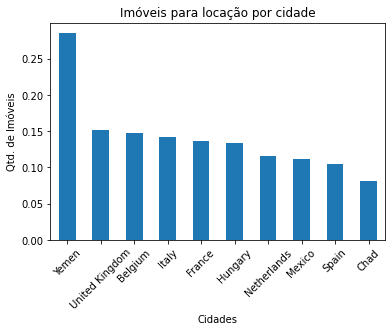

In [ ]:
df_paises_taxa['Deaths Rate'].plot(kind='bar')
plt.title("Imóveis para locação por cidade")
plt.xlabel("Cidades")
plt.ylabel("Qtd. de Imóveis")
plt.xticks(rotation = 45)

Top 10 países com mais morte

In [ ]:
df_paises_mortes = df_paises_1[['Country/Region','Deaths','Deaths Rate']].groupby(by='Country/Region').apply(sum)[['Deaths','Deaths Rate']].sort_values(by='Deaths', ascending = False).head(10)
df_paises_mortes

,Deaths,Deaths Rate
Country/Region,,
US,148011,0.034499
Brazil,87618,0.035874
United Kingdom,45844,0.151948
Mexico,44022,0.111310
Italy,35112,0.142566
India,33408,0.022572
France,30212,0.137108
Spain,28432,0.104368
Peru,18418,0.047260


In [ ]:
fig = px.bar(df_paises_mortes, y='Deaths', title='Top 10 países com mais mortes', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

Top 10 países com mais casos confirmados

In [ ]:
df_paises_casos = df_paises_1[['Country/Region','Deaths','Confirmed']].groupby(by='Country/Region').apply(sum)[['Deaths','Confirmed']].sort_values(by='Confirmed', ascending = False).head(10)
df_paises_casos

,Deaths,Confirmed
Country/Region,,
US,148011,4290259
Brazil,87618,2442375
India,33408,1480073
Russia,13334,816680
South Africa,7067,452529
Mexico,44022,395489
Peru,18418,389717
Chile,9187,347923
United Kingdom,45844,301708


In [ ]:
fig = px.bar(df_paises_casos, y='Confirmed', title='Top 10 países com mais casos confirmados', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

Top 10 países que tiveram mais recuperados

In [ ]:
df_paises_recuperados = df_paises_1[['Country/Region','Recovered','Confirmed']].groupby(by='Country/Region').apply(sum)[['Recovered','Confirmed']].sort_values(by='Recovered', ascending = False).head(10)
df_paises_recuperados

,Recovered,Confirmed
Country/Region,,
Brazil,1846641,2442375
US,1325804,4290259
India,951166,1480073
Russia,602249,816680
Chile,319954,347923
Mexico,303810,395489
South Africa,274925,452529
Peru,272547,389717
Iran,255144,293606


In [ ]:
fig = px.bar(df_paises_recuperados, y='Recovered', title='Top 10 países com mais pessoas recuperadas', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

Top 5 continentes com mais casos confirmados

In [ ]:
df_paises_continente = df_paises_1[['WHO Region','Confirmed']].groupby(by='WHO Region').apply(sum)[['Confirmed']].sort_values(by='Confirmed', ascending = False).head(10)
df_paises_continente

,Confirmed
WHO Region,
Americas,8839152
Europe,3299411
South-East Asia,1835174
Eastern Mediterranean,1490744
Africa,722440
Western Pacific,291373


In [ ]:
fig = px.bar(df_paises_continente, y='Confirmed', title='Top 5 continentes com mais casos confirmados', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

Top 5 continentes com mais mortes

In [ ]:
df_paises_continente1 = df_paises_1[['WHO Region','Deaths']].groupby(by='WHO Region').apply(sum)[['Deaths']].sort_values(by='Deaths', ascending = False).head()
df_paises_continente1

,Deaths
WHO Region,
Americas,342732
Europe,211143
South-East Asia,41349
Eastern Mediterranean,38339
Africa,12221


In [ ]:
fig = px.bar(df_paises_continente1, y='Deaths', title='Top 5 continentes com mais mortes', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

Usando o merge

In [ ]:
df_left = df_paises
df_right = df_mundo[['Country/Region','Population']]

In [ ]:
df_merge = pd.merge(df_left, df_right, how='left', on='Country/Region')
df_merge.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate,Population
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994,39009447.0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.029508,2877470.0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0.041576,43926079.0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0.057332,77278.0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0.043158,32956300.0


In [ ]:
df_merge['Confirmed/Population'] = df_merge['Confirmed']/df_merge['Population']

In [ ]:
df_merge.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate,Population,Confirmed/Population
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994,39009447.0,0.000930
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.029508,2877470.0,0.001696
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0.041576,43926079.0,0.000637
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0.057332,77278.0,0.011737
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0.043158,32956300.0,0.000029


Top 10 países com maior taxa de casos confirmados pela população

In [ ]:
df_pop = df_merge[['Country/Region','Deaths','Confirmed/Population']].groupby(by='Country/Region').sum('Deaths').sort_values(by='Confirmed/Population', ascending = False)
df_pop.head(10)

,Deaths,Confirmed/Population
Country/Region,,
Qatar,165,0.039033
Bahrain,141,0.023134
San Marino,42,0.020596
Chile,9187,0.018185
Oman,393,0.015055
Kuwait,438,0.015054
Panama,1322,0.014218
Armenia,711,0.012616
Peru,18418,0.011804


In [ ]:
fig = px.bar(df_pop, y='Confirmed/Population', title='Top 10 países com maior taxa de casos confirmados pela população', labels={'order_item_id': 'Deaths Rate', 'index':'Country/Region'})
gitly.show( fig )

**K-means**

Clusterização

In [ ]:
from sklearn.cluster import KMeans

n_kmax = 10
lista_inercia = []
for i in range(1, n_kmax):
    km = KMeans( n_clusters = i, init = 'random', n_init = 3, max_iter = 150, random_state=0 )
    km.fit( df_pop )
    lista_inercia.append( km.inertia_ )


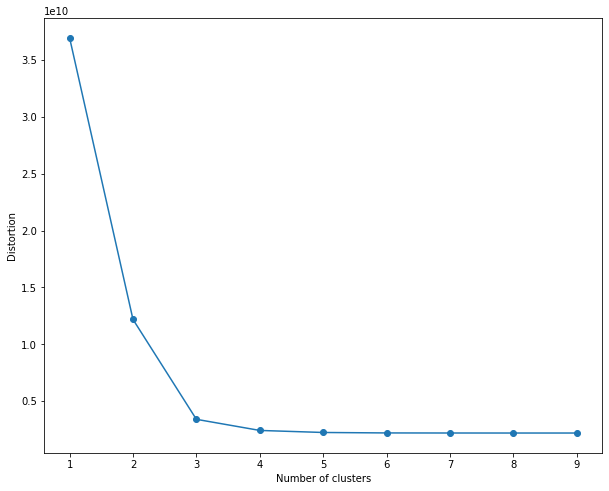

In [ ]:
import matplotlib.pyplot as plt

# plot
plt.figure( figsize=(10,8) )
plt.plot(range(1, n_kmax), lista_inercia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
k = 4
km = KMeans( n_clusters = k, init = 'random', n_init = 10, max_iter = 150, random_state=0 )
km.fit( df_pop )

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=150, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [ ]:
km.predict( df_pop.head() )

array([2, 2, 2, 0, 2], dtype=int32)

In [ ]:
teste = df_pop.iloc[5,:] 
teste

Deaths                  438.000000
Confirmed/Population      0.015054
Name: Kuwait, dtype: float64

In [ ]:
km.predict( [teste] )

array([2], dtype=int32)

In [ ]:
y_cluster = km.predict( df_pop )
y_cluster

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [ ]:
df_cluster = pd.DataFrame( data=y_cluster, columns=['grupo'], index= df_pop.index  )
df_cluster.head(20)

,grupo
Country/Region,
Qatar,2
Bahrain,2
San Marino,2
Chile,0
Oman,2
Kuwait,2
Panama,2
Armenia,2
Peru,0


In [ ]:
df_grupos = pd.merge( df_cluster, df_pop['Deaths'], how='left', left_index = True, right_index=True )
df_grupos.head()

,grupo,Deaths
Country/Region,,
Qatar,2,165
Bahrain,2,141
San Marino,2,42
Chile,0,9187
Oman,2,393


In [ ]:
fig = px.box(df_grupos, color='grupo')
gitly.show( fig, scale = 1.5 )

In [ ]:
import numpy as np

In [ ]:
df_grupos0 = df_grupos[df_grupos.grupo == 0].sort_values(by='Deaths',ascending = False)
df_grupos0.head(18)

,grupo,Deaths
Country/Region,,
Peru,0,18418
Iran,0,15912
Russia,0,13334
Belgium,0,9822
Chile,0,9187
Germany,0,9125
Canada,0,8944
Colombia,0,8777
South Africa,0,7067


In [ ]:
df_grupos0_media = df_grupos0.groupby( by='grupo' ).apply(np.mean)['Deaths']
df_grupos0_media

grupo
0    8225.222222
Name: Deaths, dtype: float64

In [ ]:
df_grupos0.shape

(18, 2)

In [ ]:
df_grupos1 = df_grupos[df_grupos.grupo == 1].sort_values(by='Deaths',ascending = False)
df_grupos1.head(6)

,grupo,Deaths
Country/Region,,
United Kingdom,1,45844
Mexico,1,44022
Italy,1,35112
India,1,33408
France,1,30212
Spain,1,28432


In [ ]:
df_grupos1_media = df_grupos1.groupby( by='grupo' ).apply(np.mean)['Deaths']
df_grupos1_media

grupo
1    36171.666667
Name: Deaths, dtype: float64

In [ ]:
df_grupos1.shape

(6, 2)

In [ ]:
df_grupos2 = df_grupos[df_grupos.grupo == 2].sort_values(by='Deaths',ascending = False)
df_grupos2.head(10)

,grupo,Deaths
Country/Region,,
Argentina,2,3059
Bangladesh,2,2965
Saudi Arabia,2,2760
Bolivia,2,2647
Romania,2,2206
Switzerland,2,1978
Philippines,2,1945
Ireland,2,1764
Guatemala,2,1761


In [ ]:
df_grupos2_media = df_grupos2.groupby( by='grupo' ).apply(np.mean)['Deaths']
df_grupos2_media

grupo
2    331.198758
Name: Deaths, dtype: float64

In [ ]:
df_grupos2.shape

(161, 2)

In [ ]:
df_grupos3 = df_grupos[df_grupos.grupo == 3].sort_values(by='Deaths',ascending = False)
df_grupos3.head( )

,grupo,Deaths
Country/Region,,
US,3,148011
Brazil,3,87618


In [ ]:
df_grupos3_media = df_grupos3.groupby( by='grupo' ).apply(np.mean)['Deaths']
df_grupos3_media

grupo
3    117814.5
Name: Deaths, dtype: float64

In [ ]:
df_grupos3.shape

(2, 2)

Correlação

In [ ]:
df_merge.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,Deaths Rate,Population,Confirmed/Population
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161,0.063518,0.604064,0.222786
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708,0.251533,0.420278,0.182916
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697,0.048380,0.552728,0.236231
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752,0.054376,0.716985,0.167776
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791,0.020069,0.833331,0.126385
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293,0.060368,0.577338,0.182128
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662,0.017048,0.737167,0.143260
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534,1.000000,0.025965,-0.014984
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254,-0.168961,-0.013469,0.146866
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083,0.334710,-0.010688,0.003997


In [ ]:
colum_names = ['Confirmed', 'Deaths', 'Recovered', 'Active','New cases','New deaths','New recovered','Deaths / 100 Cases','Recovered / 100 Cases','Deaths / 100 Recovered','Confirmed last week','1 week change','1 week % increase','Deaths Rate','Population','Confirmed/Population']

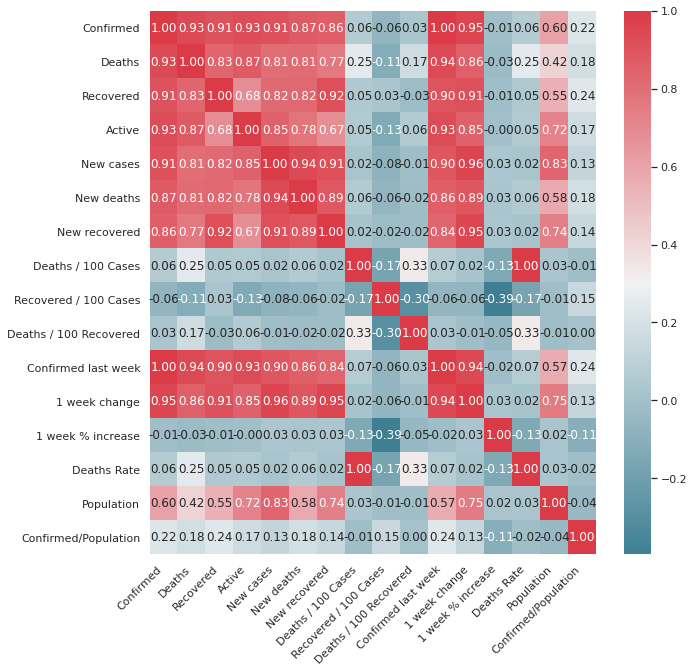

In [ ]:
import seaborn as sns; sns.set()

correlations = df_merge.corr()

# Ajusta o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 10))

# Gera o mapa de cor
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Permite a visualização dos valores
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

In [ ]:
import pandas as pd
import numpy as np

bridge_df = pd.DataFrame(df_merge['WHO Region'].unique(), columns=['Bridge_Types'])

bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')

bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Eastern Mediterranean,2
1,Europe,3
2,Africa,0
3,Americas,1
4,Western Pacific,5
5,South-East Asia,4


In [ ]:
df_1 = df_merge['WHO Region'] 
df_12 = df_1.replace("Europe","3")
df_12

df_2 = df_12.replace("Africa","0")
df_3 = df_2.replace("Americas","1")
df_4 = df_3.replace("Western Pacific","5")
df_5 = df_4.replace("South-East Asia","4")
df_6 = df_5.replace("Eastern Mediterranean","2")
df_6.head(10)

df_merge["Continents"] = df_6
df_merge["Continents"] = df_merge["Continents"].astype(np.int64)
df_merge

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deaths Rate,Population,Confirmed/Population,Continents
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.034994,39009447.0,0.000930,2
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.029508,2877470.0,0.001696,3
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0.041576,43926079.0,0.000637,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0.057332,77278.0,0.011737,3
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0.043158,32956300.0,0.000029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,0.007344,NaN,NaN,2
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,0.100000,598682.0,0.000017,0
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,0.285630,29886897.0,0.000057,2
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,0.030756,18430129.0,0.000247,0
